# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# for model building
from sklearn.model_selection import train_test_split

## Logistic Regression
from sklearn.linear_model import LogisticRegression

## Multi Layer Perceptron a.k.a Neural Network
import tensorflow as tf

## Linear Regression
from sklearn.linear_model import LinearRegression

# for performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score


#  **Importing the dataset**

In [ ]:
df = pd.read_excel('wines.csv.xlsx')
df['Class'].replace(1.0, 'A', inplace=True)
df['Class'].replace(2.0, 'B', inplace=True)
df['Class'].replace(3.0, 'C', inplace=True)
df


,Alcholol,Malic acid,Ash,Alcanity,Magnesium,Total Phenol,Flavanoids,N Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,A
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,A
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,A
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,A
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,C
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,C
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,C
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,C


# **Preprocessing the data**

> ## Handling Missing Values



In [ ]:
df.isna().sum()

Alcholol           0
Malic acid         0
Ash                0
Alcanity           0
Magnesium          0
Total Phenol       0
Flavanoids         0
N Phenols          0
Proanthocyanins    0
Color Intensity    0
Hue                0
OD280/OD315        0
Proline            0
Class              0
dtype: int64

In [ ]:
# df.interpolate(method = 'linear', inplace = True)
# df.isna().sum()

> ## Count of unique values

In [ ]:
df.nunique()


Alcholol           126
Malic acid         133
Ash                 79
Alcanity            63
Magnesium           53
Total Phenol        97
Flavanoids         132
N Phenols           39
Proanthocyanins    101
Color Intensity    132
Hue                 78
OD280/OD315        122
Proline            121
Class                3
dtype: int64

> ## Correlation between different variables

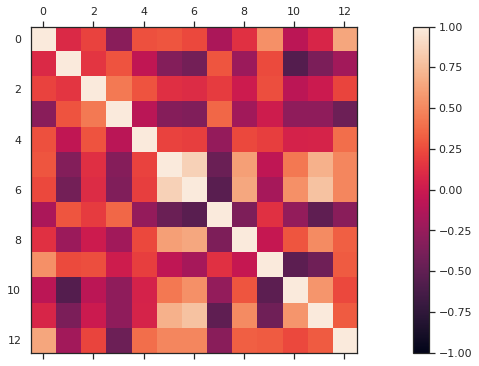

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
# plt.figure(figsize=(2, 2))
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

> ## Skewness of the features

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

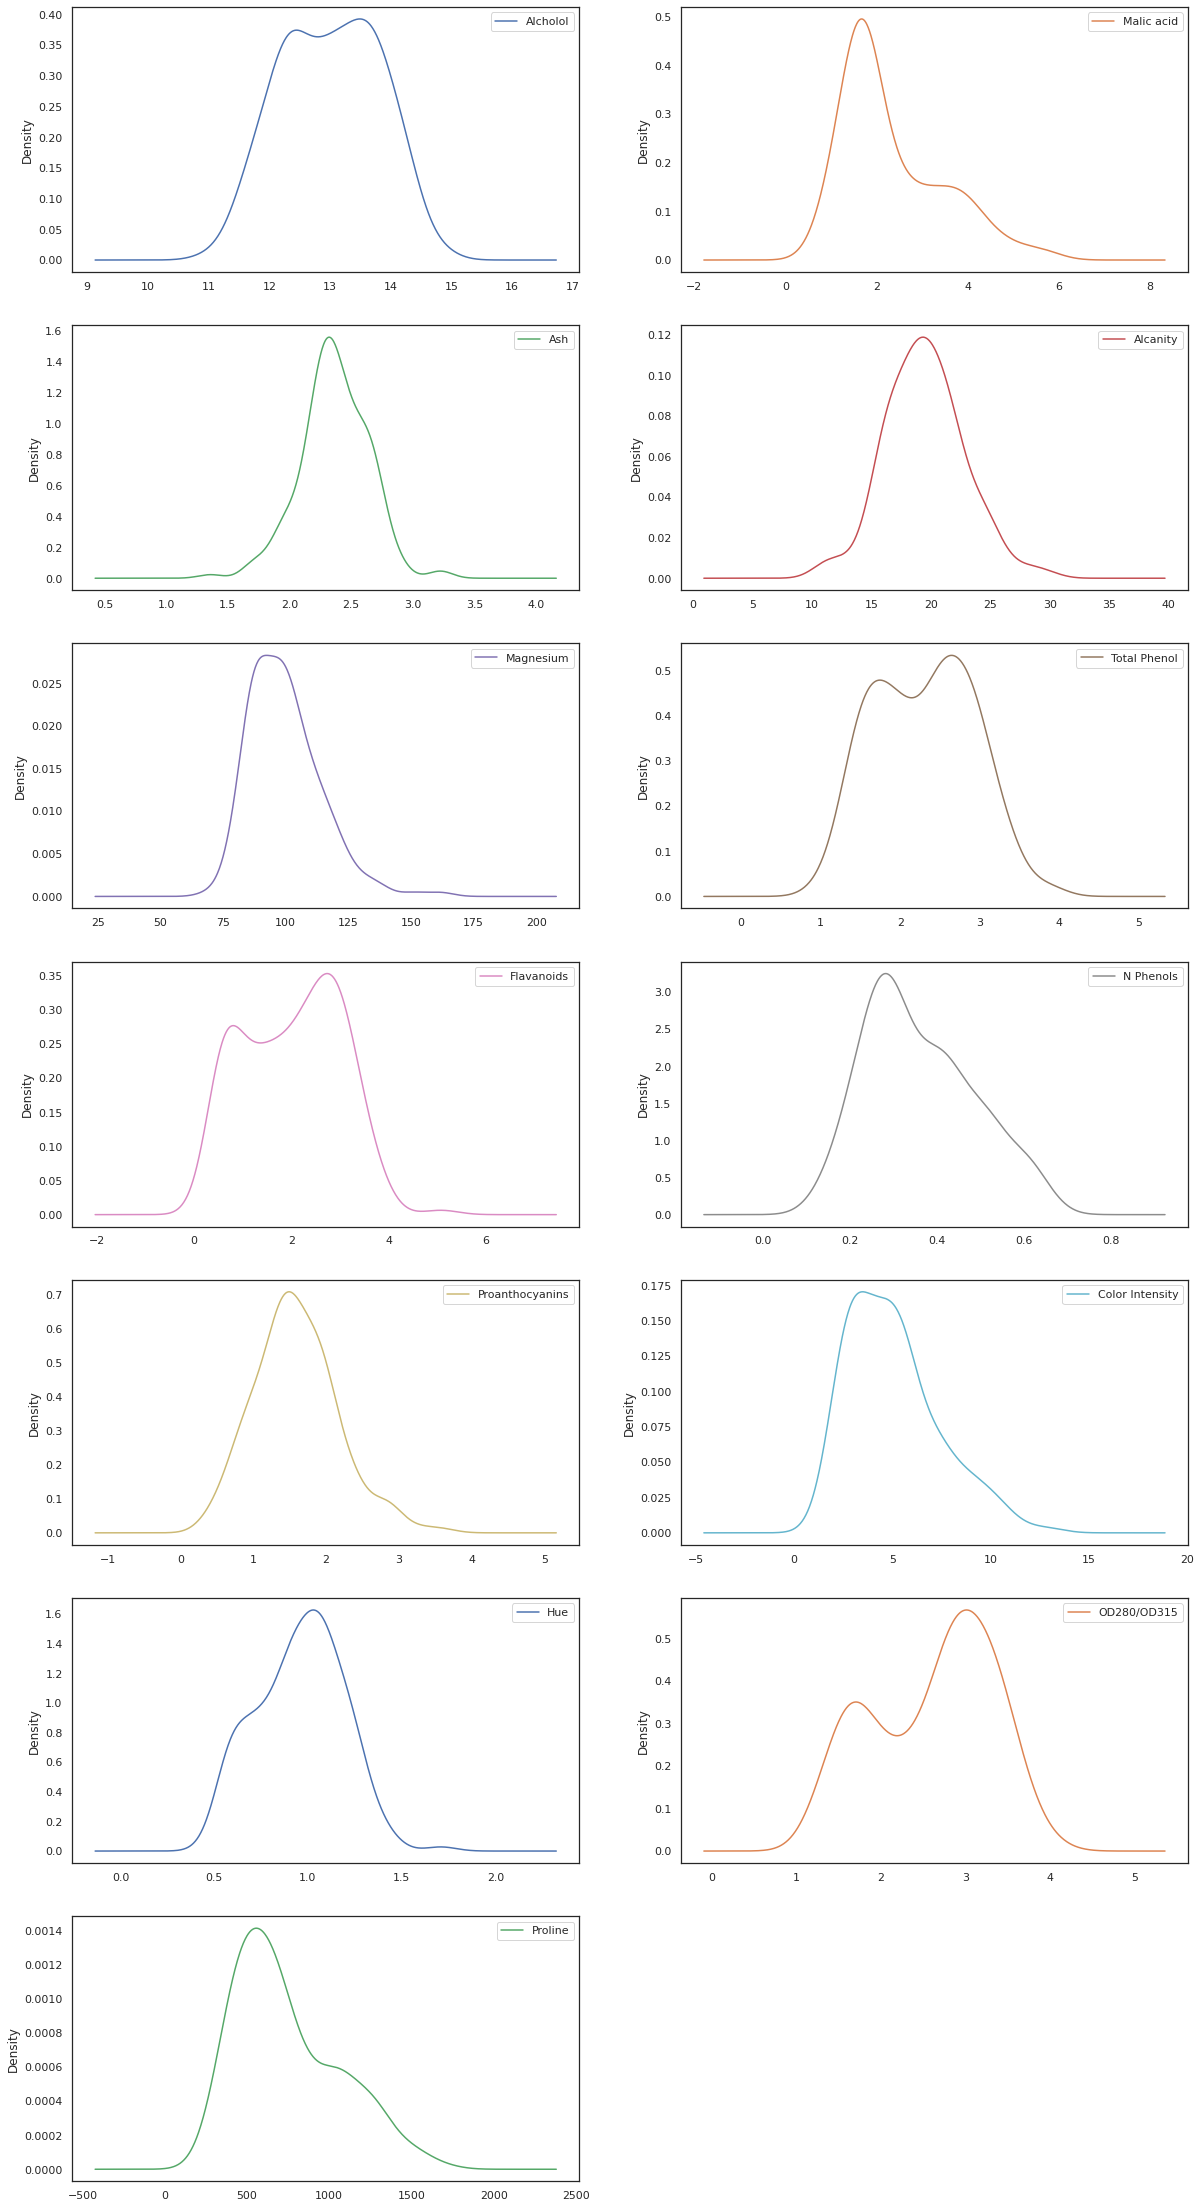

In [ ]:
plt.rcParams["figure.figsize"] = (20, 40)
df.plot(kind='density',subplots=True,layout=(7, 2),sharex=False)
# plt.rcParams["figure.figsize"] = (20, 40)
plt


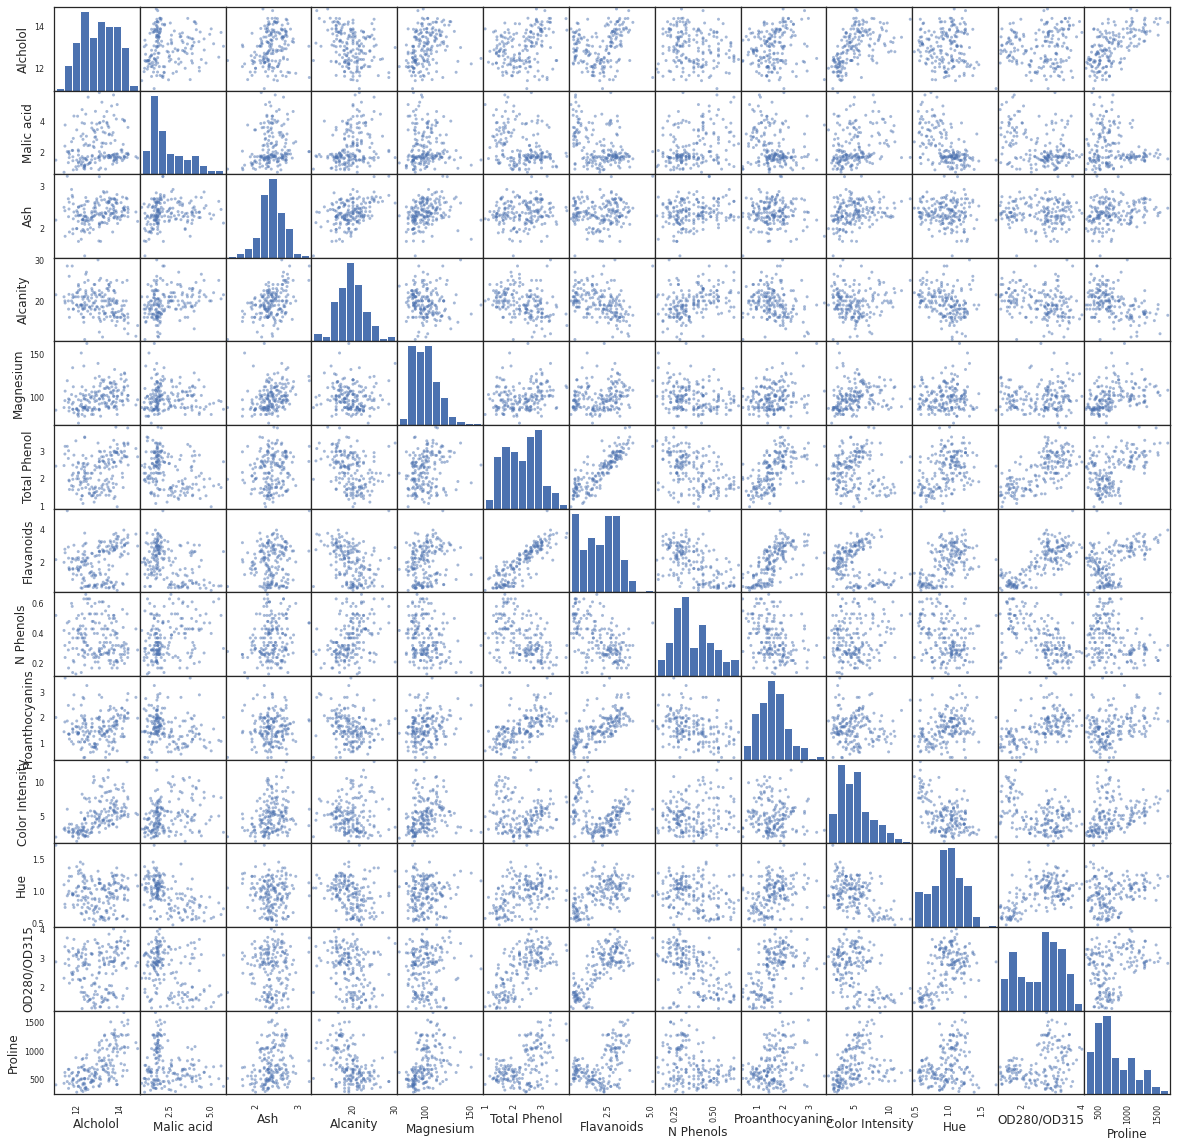

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,20))
plt.show()


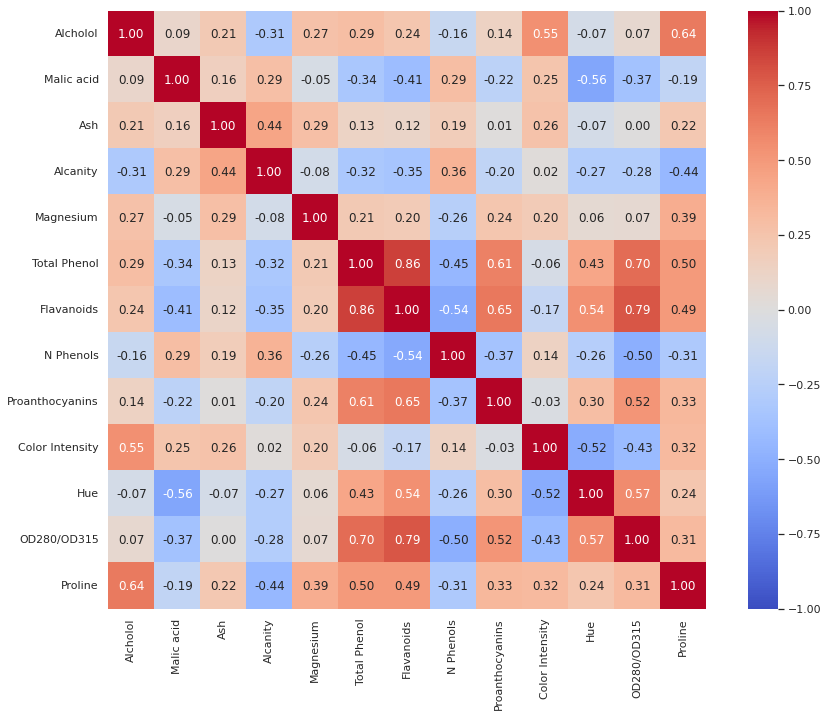

In [ ]:
# correlation matrix heatmap visualization
sns.set(style="white")
fig, ax = plt.subplots(figsize=(15,11))
_ = sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')  


# **Taking the Independent and Dependent variables**

In [ ]:
y = df.iloc[:, [13]].values
X = df.iloc[:, 0:13].values

# **Feature Importance / Selection**

> ## Test for numerical input and categorical output using ANOVA (Analysis of Variance) correlation coefficient (linear)



In [ ]:
# ANOVA
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
scores_df = pd.DataFrame()
scores_df['score'] = scores
scores_df['feature no.'] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
scores_df.sort_values(by=['score'], ascending=False, inplace=True)
scores_df

,score,feature no.
6,1.000000,6
12,0.935158,12
11,0.886986,11
0,0.717560,0
9,0.666105,9
10,0.591132,10
5,0.559626,5
1,0.270698,1
3,0.263426,3
8,0.228345,8


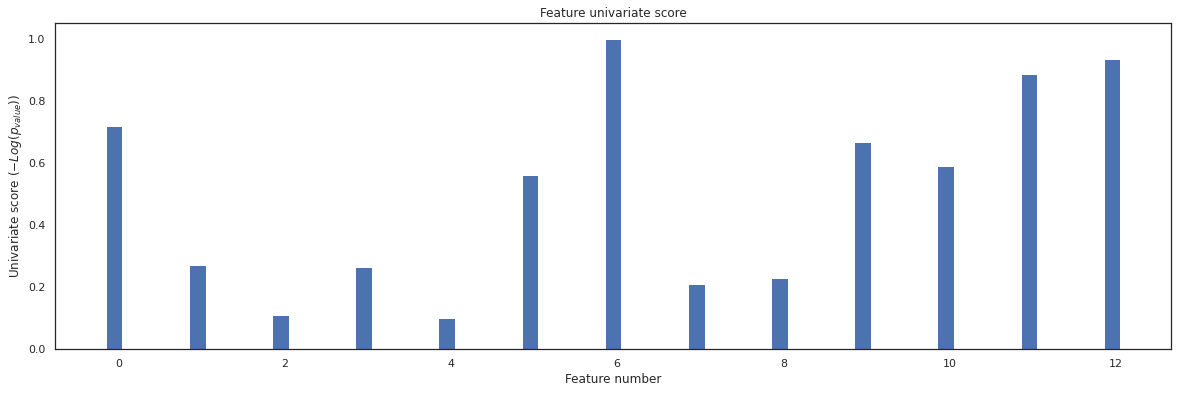

In [ ]:
X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(scores_df['feature no.'] - 0.05, scores_df['score'], width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.rcParams["figure.figsize"] = (20, 6)
plt.show()

# **Multi Layer Perceptron (MLP) a.k.a Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(random_state=42)

In [ ]:
mlp.score(X_test,y_test)

0.9722222222222222

In [ ]:
mlp.coefs_

[array([[ 1.04878742e-01,  1.09087251e-01, -2.23923956e-02,
          1.47108118e-01, -2.94728073e-01, -1.43944663e-01,
         -1.29552009e-01,  1.12015163e-01,  3.66703204e-02,
          1.80952079e-01, -1.35278880e-01,  3.05939407e-01,
          2.43116335e-01, -2.18534023e-01,  2.28889933e-02,
         -6.71639341e-02, -3.26923875e-02, -5.30991156e-02,
          6.28434214e-02, -3.35925064e-01, -1.53141971e-03,
         -4.90984638e-02, -2.18823289e-01, -1.59342200e-01,
         -1.09851902e-01,  2.14201190e-01, -4.15820260e-02,
         -1.19791591e-01, -5.10679546e-02, -8.46076861e-02,
         -8.80447150e-03, -2.60394932e-01, -1.14122083e-01,
          2.49240662e-01,  3.08610468e-01,  2.24671897e-01,
         -1.78775298e-01, -2.12816189e-01,  6.38599684e-02,
          4.68453537e-02, -9.92768540e-02, -1.68296442e-01,
         -8.27504372e-02,  1.15501992e-01, -8.04694434e-02,
          2.06317204e-01, -2.60355303e-01, -2.44470585e-02,
          1.20463587e-01, -5.16591302e-0

In [ ]:
mlp.intercepts_

[array([ 2.14259015e-01,  1.26853237e-01,  2.66056300e-03,  1.79138772e-01,
         1.85989501e-01, -2.00062338e-01,  1.64176518e-01,  1.62203628e-01,
         2.74711848e-01,  5.73385138e-02,  1.94102387e-01, -7.88970266e-02,
         3.49097426e-01,  2.72986464e-01, -3.87649162e-02, -1.64508818e-01,
        -2.13764728e-02,  2.85512915e-01,  2.84562383e-01,  5.24796557e-03,
        -2.86403077e-02,  9.12192719e-02,  2.75359890e-01,  2.39457882e-01,
         2.51506622e-01,  7.73977030e-02,  7.44308286e-02,  3.93883444e-02,
        -2.57014047e-01,  2.63249086e-01,  2.49891148e-01,  2.75769676e-01,
         3.46701811e-01,  1.48130520e-01,  2.57842473e-01,  1.77027739e-01,
         2.61719105e-01, -1.11231791e-01,  1.06649959e-01, -2.20864418e-01,
         3.14098986e-01,  1.78017370e-01, -4.10394063e-02,  5.08841981e-02,
         4.95233680e-05,  4.38903427e-02, -3.29480500e-02,  1.72818680e-01,
         1.00641667e-01,  2.23464653e-01, -5.58235585e-02,  2.11557239e-01,
        -1.6

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

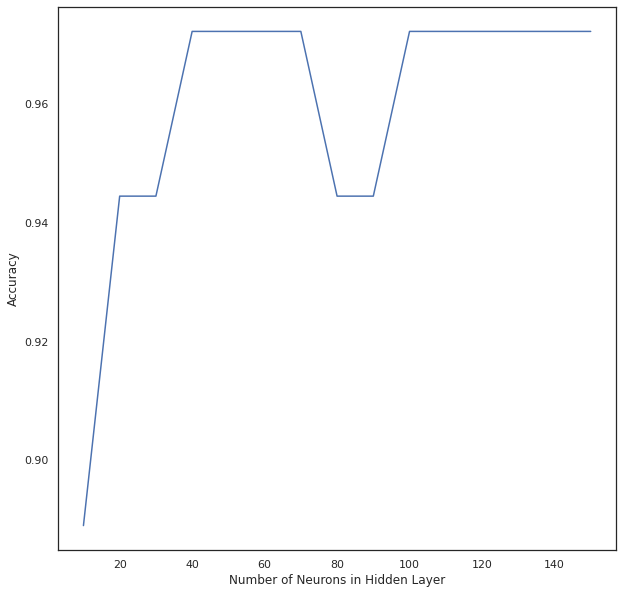

In [ ]:
neu_num =[]
neu_score = []
for i in range(10,151,10):
  mlp = MLPClassifier(hidden_layer_sizes=(i,),random_state=42)
  mlp.fit(X_train,y_train)
  neu_score.append(mlp.score(X_test,y_test))
  neu_num.append(i)

plt.figure(figsize=(10,10))
plt.plot(neu_num,neu_score)
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

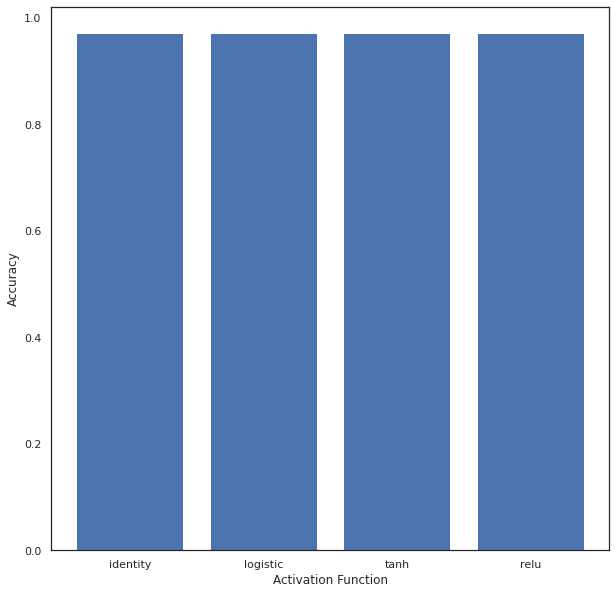

In [ ]:
func = ['identity','logistic','tanh','relu']
ac_score=[]
for i in func:
  mlp = MLPClassifier(hidden_layer_sizes=(140,),activation=i,random_state=42)
  mlp.fit(X_train,y_train)
  ac_score.append(mlp.score(X_test,y_test))

plt.figure(figsize=(10,10))
plt.bar(func,ac_score)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
ac_score

[0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

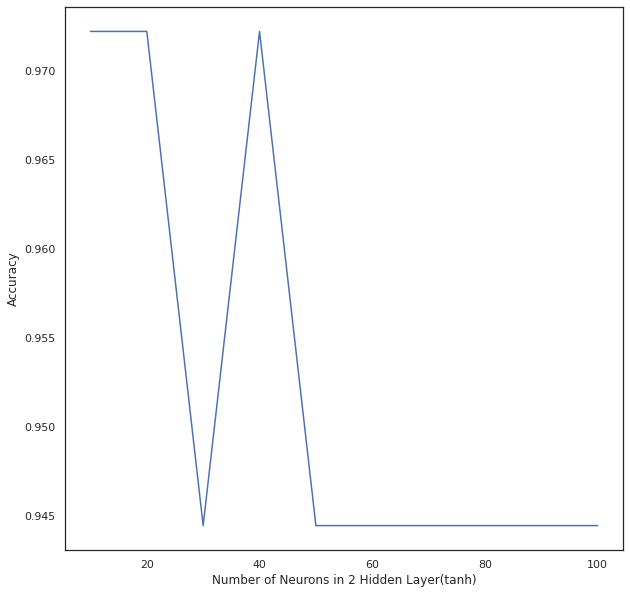

In [ ]:
lay2_num =[]
lay2_score=[]
for i in range(10,101,10):
  mlp = MLPClassifier(hidden_layer_sizes=(140,i),activation='tanh',random_state=42)
  mlp.fit(X_train,y_train)
  lay2_score.append(mlp.score(X_test,y_test))
  lay2_num.append(i)

plt.figure(figsize=(10,10))
plt.plot(lay2_num,lay2_score)
plt.xlabel('Number of Neurons in 2 Hidden Layer(tanh)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
max(lay2_score)

0.9722222222222222

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

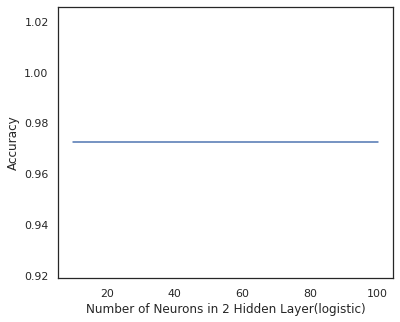

In [ ]:
blay2_num =[]
blay2_score=[]
for i in range(10,101,10):
  mlp = MLPClassifier(hidden_layer_sizes=(140,i),activation='logistic',random_state=4)
  mlp.fit(X_train,y_train)
  blay2_score.append(mlp.score(X_test,y_test))
  blay2_num.append(i)

plt.figure(figsize=(6,5))
plt.plot(blay2_num,blay2_score)
plt.xlabel('Number of Neurons in 2 Hidden Layer(logistic)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
max(blay2_score)

0.9722222222222222